# Pymaceuticals Inc.
---

### Analysis

- Most mice were treated using capomulin and ramicane - most effective on mice where their final average tumor volumes were lower.
- There appears to be a strong correlation between weight and tumor volume for capomulin-treated mice. Heavier mice = larger tumors
- Mouse l509's tumor volumes decreased with capomulin treatment.
 

In [255]:
pip install matplotlib

In [37]:
import numpy as np

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
# Checking the number of mice. - use .unique()
len(study_data_complete["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# use .duplicated() function
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [47]:
# Optional: Get all the data for the duplicate mouse ID.

In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use .isin()
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

249

## Summary Statistics

In [67]:
# calculate the means
numeric_data = clean_study_data_complete.select_dtypes(include=["number"])
means = numeric_data.groupby(clean_study_data_complete["Drug Regimen"]).mean()
means["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Calculate the medians
numeric_data = clean_study_data_complete.select_dtypes(include=["number"])
medians = numeric_data.groupby(clean_study_data_complete["Drug Regimen"]).median()

In [91]:
# Calculate the variances
variances = clean_study_data_complete.groupby("Drug Regimen").var(numeric_only=True)

In [101]:
# Calculate the standard deviations
stds = clean_study_data_complete.groupby("Drug Regimen").std(numeric_only=True)

In [109]:
# Calculate the standard errors
sems = clean_study_data_complete.groupby("Drug Regimen").sem(numeric_only=True)

In [111]:
# Generate a summary dictionary
summaryDict = {
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Tumor Volume Variance": variances["Tumor Volume (mm3)"],
    "Tumor Volume Std. Dev.": stds["Tumor Volume (mm3)"],
    "Tumor Volume Std. Err.": sems["Tumor Volume (mm3)"]
}
df = pd.DataFrame(summaryDict)

# Display the summary DataFrame
print(df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


In [113]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line. use.agg()
df2 = clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
df2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [117]:
# generate the series for all drug regimens - counts of timepoints (count of occurences of each drug regimen)
counts = clean_study_data_complete["Drug Regimen"]. value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

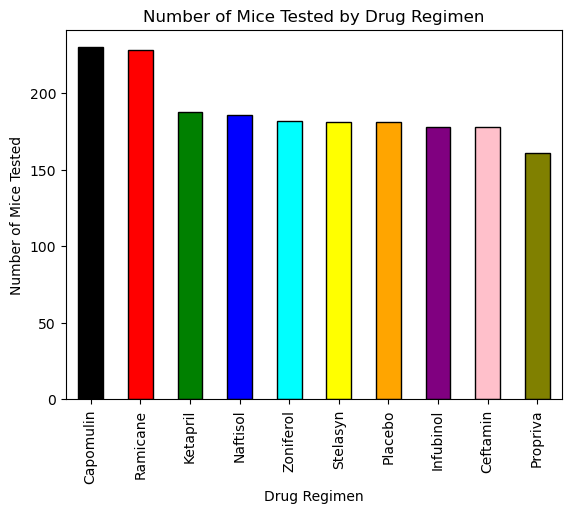

In [121]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind="bar",
            color=['black', 'red', "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [123]:
counts.index.values # show the names of the regimens

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [127]:
counts.values # show the values of the counts

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161], dtype=int64)

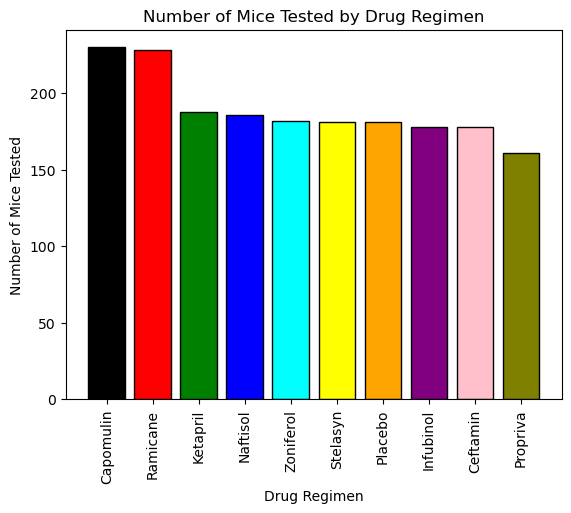

In [129]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
        color=['black', 'red', "green", "blue", "cyan", "yellow", "orange", "purple", "pink", "olive", "brown"],
        edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [131]:
# gender counts
counts = clean_study_data_complete["Sex"]. value_counts()
counts

Sex
Male      958
Female    935
Name: count, dtype: int64

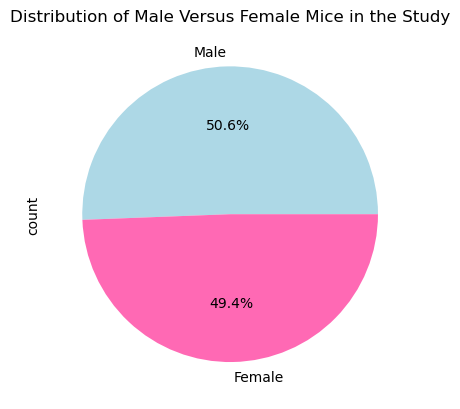

In [137]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["lightblue", "hotpink"]
)

plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


In [139]:
counts.index.values # show the names of the genders

array(['Male', 'Female'], dtype=object)

In [141]:
counts.values # show the counts of the genders

array([958, 935], dtype=int64)

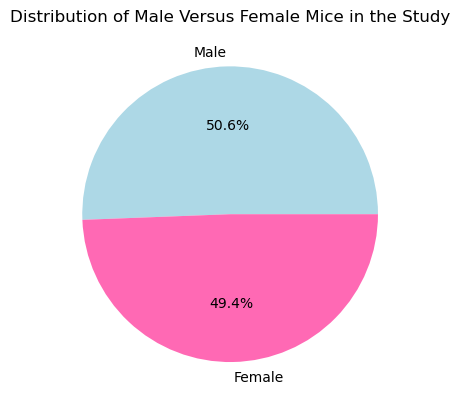

In [143]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(
    counts.values,
    labels=counts.index.values,
    autopct="%1.1f%%",
    colors=["lightblue", "hotpink"]
)

plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse (max timepoint)
# group by mouse ID -> get the max of the Timepoint column
#clean_study_data_complete.head()
maxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max() # create a series
# to convert the series to a dataframe, reset the index of the series
maxTime = maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [151]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [153]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# merge to keep data for the max timepoints of each mouse only
merged_data = maxTime.merge(clean_study_data_complete, on=["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [159]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
   info = merged_data.loc[merged_data["Drug Regimen"] == treatment]

info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
76,h531,5,47.784682,0,Ceftamin,Male,5,27
89,j296,45,61.849023,3,Ceftamin,Female,24,30
95,k210,45,68.923185,3,Ceftamin,Male,15,28
107,l471,45,67.748662,1,Ceftamin,Female,7,28
108,l490,30,57.918381,3,Ceftamin,Male,24,26


In [161]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
   final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

final_tumor_vol #prints Ceftamin results -> isolated to get the Tumor Volume Column

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [165]:
# Create / recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
   final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
   #add to the empty tumor volume list
   tumor_vol_list.append(final_tumor_vol)

tumor_vol_list #prints a list of series

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [206]:
# Create / recreate empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes - use .Loc()
   final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
   # add to the empty tumor volume list
   tumor_vol_list.append(final_tumor_vol)
   
# Determine outliers using upper and lower bounds
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
if len(outliers) == 0:
       print(f"{treatment}'s potential outliers: None")
else:
     output = f"{treatment}'s potential outliers: "
     for o in outliers:
         output += f"{o} "
         print(output)

Ceftamin's potential outliers: None


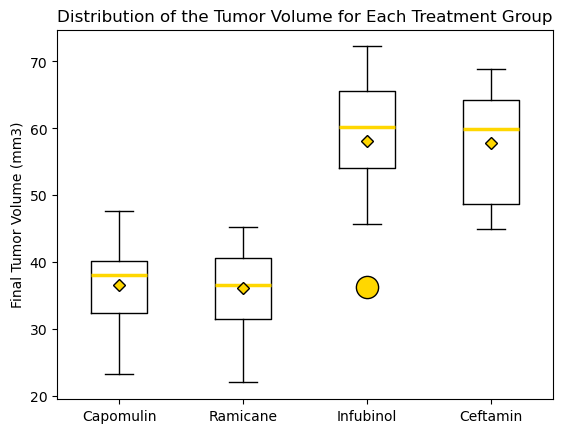

In [212]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# customize the outliers
flierprops = dict(marker='o', markerfacecolor='gold', markersize=16,
                  markeredgecolor='black')
# customize the median line
medianprops = dict(linestyle='-', linewidth=2.5, color='gold')
# customize the mean
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='gold')

plt.boxplot(tumor_vol_list, tick_labels = treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops,
            showmeans = True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.show()


## Line and Scatter Plots

In [214]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [218]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [222]:
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509"]
l509Data # we just need the Timepoint (x) and Tumor Volume columns (y)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


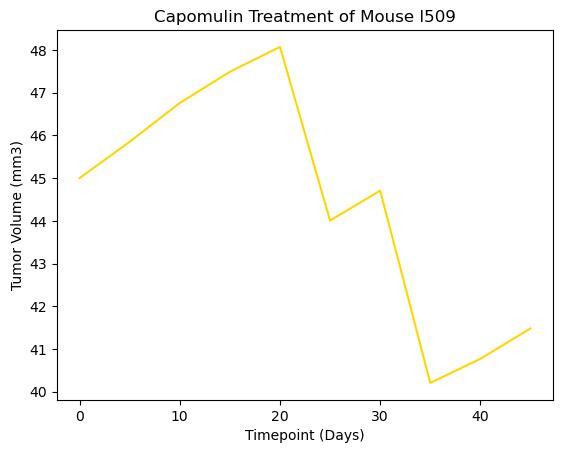

In [224]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509Data["Timepoint"],
         l509Data["Tumor Volume (mm3)"],
         color="gold")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [228]:
# Group by "Mouse ID" and calculate the mean for numeric columns
capomulinAveragesDF = capomulinDF.groupby("Mouse ID").mean(numeric_only=True)
capomulinAveragesDF.head() # only need the Weight (g) (X axis) and the Tumor Volume (Y axis)

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


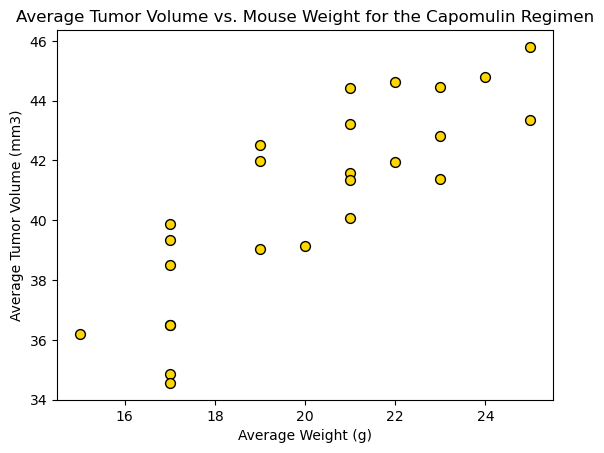

In [236]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAveragesDF["Weight (g)"],
    capomulinAveragesDF["Tumor Volume (mm3)"],
    facecolor="gold",
    edgecolor="black",
    s=50
)

plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()

## Correlation and Regression

In [246]:
corr = st.pearsonr(capomulinAveragesDF['Weight (g)'],capomulinAveragesDF['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


In [248]:
x_values = capomulinAveragesDF["Weight (g)"]
y_values = capomulinAveragesDF["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAveragesDF['Weight (g)'],
                                                           capomulinAveragesDF['Tumor Volume (mm3)'])

regressValues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

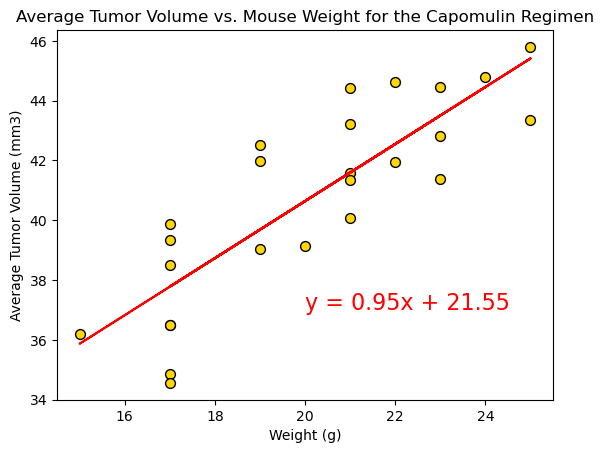

In [252]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_values, y_values, facecolor="gold", edgecolor="black", s=50)

plt.plot(x_values, regressValues, "r-")
plt.annotate(lineEQ, (20, 37), fontsize=16, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()